In [661]:
import pandas as pd
import pytz
from datetime import datetime, timedelta
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [675]:
path='datos2021/'
#datos= pd.read_csv(path+"DAT03Marzo2021_1237_Allday.csv", dtype={'Fecha': 'str','Hora(UTC)': 'str'})
datos= pd.read_csv(path+"DAT050420211542_Allday.csv", dtype={'Fecha': 'str','Hora(UTC)': 'str'})

In [676]:
mex=pd.DataFrame(datos)
mex['datetime']=pd.to_datetime(mex['Fecha'] +mex['Hora(UTC)'], format='%d%m%y%H%M%S')
mex['Coincidencias']=mex['Coincidencias'].values/(1.448*0.0625)/3600
#mex['Coincidencias']=mex['Coincidencias'].values
mex.set_index(['datetime'],drop=True, inplace=True)
mex=mex.resample('H').sum()

In [678]:
py = pd.read_json (filenamePy, lines=True)
py['datetime']=pd.to_datetime(py.hora, unit='s',utc=True)
py['datetime'] = py['datetime'].dt.tz_convert('America/Sao_Paulo')
py.set_index(['datetime'],drop=True, inplace=True)
py= py.iloc[1:]

In [679]:
py=py.resample('H').sum()

In [680]:
py['conteo']=py['conteo'].values/(0.0512*0.028)/3600
py['canal_a']=py['canal_a'].values/(1.364*0.028)/3600
py['canal_b']=py['canal_b'].values/(0.0512*0.028)/3600
py['ratio']=py['canal_a'].values - py['conteo'].values
#py['conteo']=py['conteo'].values/1
#py['canal_a']=py['canal_a'].values/1
#py['canal_b']=py['canal_b'].values/1
#py['ratio']=py['canal_a'].values - py['conteo'].values


In [681]:
py.to_json(r'/home/lmenode1/jsonserver/fake-simple-json-datasource-master/Export_DataFrame.json',orient='index')


In [682]:
mex.tail()

,Coincidencias
datetime,
2021-04-19 13:00:00,19.048496
2021-04-19 14:00:00,18.241252
2021-04-19 15:00:00,18.394721
2021-04-19 16:00:00,17.612032
2021-04-19 17:00:00,16.961326


In [683]:
flagPy1=np.logical_and(py.index>"2021-04-05",py.index<"2021-04-20")
flagMex=np.logical_and(mex.index>"2021-04-05",mex.index<"2021-04-20")

In [657]:
py.tail()

,eficiencia,coincidencia,conteo,canal_a,canal_b,hora,ratio
datetime,,,,,,,
2021-04-20 05:00:00-03:00,27.705201,3.541667,82.349020,114.720069,93.199715,4.856722e+10,32.371049
2021-04-20 06:00:00-03:00,28.352396,3.591667,83.511595,111.439859,90.099516,4.856733e+10,27.928265
2021-04-20 07:00:00-03:00,28.802694,3.741667,86.999318,112.079900,93.005952,4.856744e+10,25.080582
2021-04-20 08:00:00-03:00,27.980859,3.766667,87.580605,113.425441,95.137339,4.856754e+10,25.844836
2021-04-20 09:00:00-03:00,5.611905,0.708333,16.469804,22.736001,18.213666,9.713522e+09,6.266196


(40.0, 120.0)

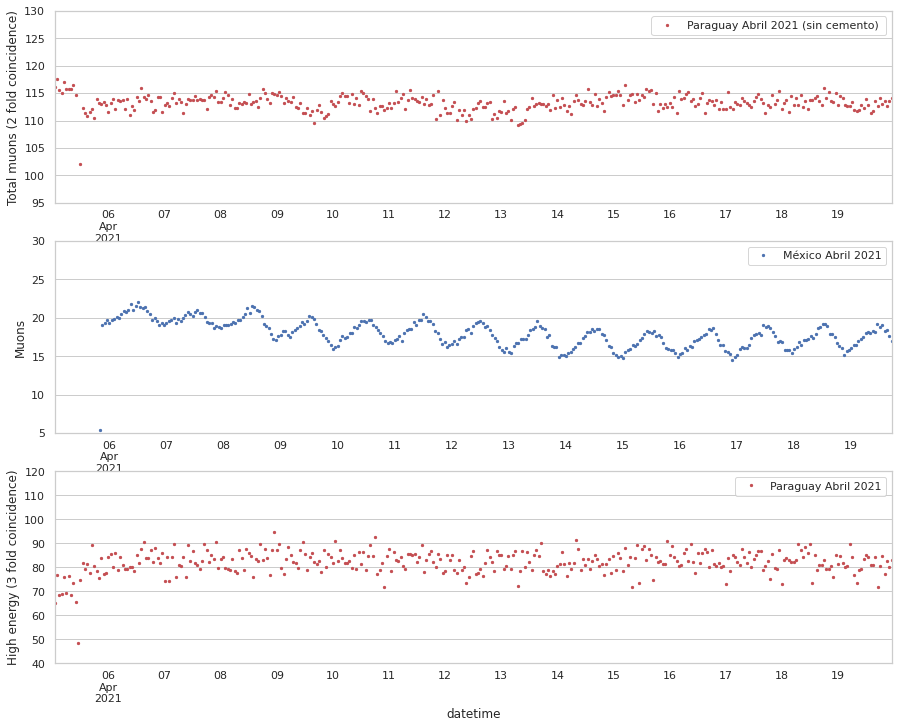

In [692]:
fig, axes = plt.subplots(3,1, figsize=(15,12), sharex=True)
plt.subplot(311)

axes =py['canal_a'][flagPy1].plot(marker='.',markersize=4.5, linestyle='None',legend=True,  label='Paraguay Abril 2021 (sin cemento) ',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylim(95, 130)
ax.set_ylabel('Total muons (2 fold coincidence)')

plt.subplot(312)
#axes =py['conteo'][flagPy1].plot(marker='.',markersize=4.5, linestyle='None',legend=True,  label='Paraguay Marzo 2021 (cosmic) ',alpha=1,color='r', subplots=True)
axes = mex['Coincidencias'][flagMex].plot(marker='.',markersize=4.5,linestyle='None',legend=True, label='México Abril 2021',alpha=1,color='b', subplots=True)
ax = plt.gca()
ax.set_ylabel('Muons')
ax.set_ylim(5, 30)


plt.subplot(313)
axes =py['conteo'][flagPy1].plot(marker='.',markersize=4.5, linestyle='None',legend=True,  label='Paraguay Abril 2021',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('High energy (3 fold coincidence)')
ax.set_ylim(40, 120)


(0.0, 40.0)

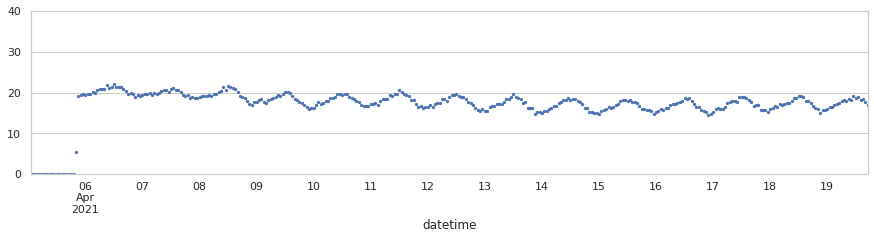

In [685]:
fig1, ax1 = plt.subplots(figsize=(15,3), sharex=True)
mex['Coincidencias'][flagMex].plot(ax=ax1,marker='.',markersize=4.5,linestyle='None', label='México Abril 2021',alpha=1,color='b', subplots=True)
ax1.set_ylim(0, 40)


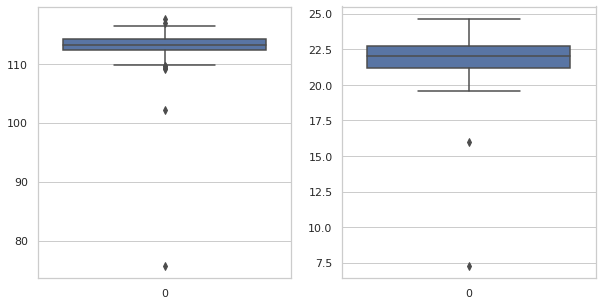

In [672]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(10,5), sharex=True)
plt.subplot(121)
sns.set(style="whitegrid")
ax = sns.boxplot(data=py['canal_a'][flagPy1])
plt.subplot(122)
sns.set(style="whitegrid")
ax = sns.boxplot(data=mex['Coincidencias'])
plt.savefig("boxplot.png", bbox_inches='tight')